In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../../Functions/')

from EDA_functions import ExploratoryDataAnalysis
eda = ExploratoryDataAnalysis()

In [16]:
pd.options.display.max_rows = 150 
pd.set_option("display.max_colwidth", 300)
plt.style.use('seaborn-darkgrid')

In [17]:
columns_desc = pd.read_csv('../../Datasets/HomeCredit_columns_description.csv', encoding = 'latin-1', index_col = 0)
columns_desc.replace('SK_ID_PREV ', 'SK_ID_PREV', inplace = True)

### 1. Aplication (Train and Test)

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET). Static data for all applications. One row represents one loan in our data sample. Since we want to join the datasets together in a single dataset, we wanted to join the 'application_train.csv' and 'application_test.csv' together, and perform the exploratory data analysis on the full dataset. **However, there's a problem: the train set has the target column, while the test set doesn't. Therefore, we can't join them right away. We'll keep them separate, and since we are going to merge the different datasets on SK_ID_CURR, we'll be able to assign each variable to the rightful instance. That being said, we'll only explore the data for the training set, and any data cleaning that we might do we'll also be applied to the test set in the same way.** 

In [18]:
# reading the datasets
app_train = pd.read_csv("../../Datasets/application_train.csv")
app_test = pd.read_csv("../../Datasets/application_test.csv")

In [19]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [20]:
app_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

Firstly, let's analyze the columns that we have.

In [21]:
print("The Application Train Set has %d rows and %d columns, while the Test Set has %d rows and %d columns (it doesn't include the target column)." % (
    app_train.shape[0], app_train.shape[1], app_test.shape[0], app_test.shape[1] ))

The Application Train Set has 307511 rows and 122 columns, while the Test Set has 48744 rows and 121 columns (it doesn't include the target column).


In [22]:
columns_desc[columns_desc['Table'] == 'application.csv']

Table                           Row  \
1    application.csv                    SK_ID_CURR   
2    application.csv                        TARGET   
5    application.csv            NAME_CONTRACT_TYPE   
6    application.csv                   CODE_GENDER   
7    application.csv                  FLAG_OWN_CAR   
8    application.csv               FLAG_OWN_REALTY   
9    application.csv                  CNT_CHILDREN   
10   application.csv              AMT_INCOME_TOTAL   
11   application.csv                    AMT_CREDIT   
12   application.csv                   AMT_ANNUITY   
13   application.csv               AMT_GOODS_PRICE   
14   application.csv               NAME_TYPE_SUITE   
15   application.csv              NAME_INCOME_TYPE   
16   application.csv           NAME_EDUCATION_TYPE   
17   application.csv            NAME_FAMILY_STATUS   
18   application.csv             NAME_HOUSING_TYPE   
19   application.csv    REGION_POPULATION_RELATIVE   
20   application.csv                    DAYS_BIRTH   
21   application.csv                 DAYS_EMPLOYED   
22   application.csv             DAYS_REGISTRATION   
23   application.csv               DAYS_ID_PUBLISH   
24   application.csv                   OWN_CAR_AGE   
25   application.csv                    FLAG_MOBIL   
26   application.csv                FLAG_EMP_PHONE   
27   application.csv               FLAG_WORK_PHONE   
28   application.csv              FLAG_CONT_MOBILE   
29   application.csv                    FLAG_PHONE   
30   application.csv                    FLAG_EMAIL   
31   application.csv               OCCUPATION_TYPE   
32   application.csv               CNT_FAM_MEMBERS   
33   application.csv          REGION_RATING_CLIENT   
34   application.csv   REGION_RATING_CLIENT_W_CITY   
35   application.csv    WEEKDAY_APPR_PROCESS_START   
36   application.csv       HOUR_APPR_PROCESS_START   
37   application.csv    REG_REGION_NOT_LIVE_REGION   
38   application.csv    REG_REGION_NOT_WORK_REGION   
39   application.csv   LIVE_REGION_NOT_WORK_REGION   
40   application.csv        REG_CITY_NOT_LIVE_CITY   
41   application.csv        REG_CITY_NOT_WORK_CITY   
42   application.csv       LIVE_CITY_NOT_WORK_CITY   
43   application.csv             ORGANIZATION_TYPE   
44   application.csv                  EXT_SOURCE_1   
45   application.csv                  EXT_SOURCE_2   
46   application.csv                  EXT_SOURCE_3   
47   application.csv                APARTMENTS_AVG   
48   application.csv              BASEMENTAREA_AVG   
49   application.csv   YEARS_BEGINEXPLUATATION_AVG   
50   application.csv               YEARS_BUILD_AVG   
51   application.csv                COMMONAREA_AVG   
52   application.csv                 ELEVATORS_AVG   
53   application.csv                 ENTRANCES_AVG   
54   application.csv                 FLOORSMAX_AVG   
55   application.csv                 FLOORSMIN_AVG   
56   application.csv                  LANDAREA_AVG   
57   application.csv          LIVINGAPARTMENTS_AVG   
58   application.csv                LIVINGAREA_AVG   
59   application.csv       NONLIVINGAPARTMENTS_AVG   
60   application.csv             NONLIVINGAREA_AVG   
61   application.csv               APARTMENTS_MODE   
62   application.csv             BASEMENTAREA_MODE   
63   application.csv  YEARS_BEGINEXPLUATATION_MODE   
64   application.csv              YEARS_BUILD_MODE   
65   application.csv               COMMONAREA_MODE   
66   application.csv                ELEVATORS_MODE   
67   application.csv                ENTRANCES_MODE   
68   application.csv                FLOORSMAX_MODE   
69   application.csv                FLOORSMIN_MODE   
70   application.csv                 LANDAREA_MODE   
71   application.csv         LIVINGAPARTMENTS_MODE   
72   application.csv               LIVINGAREA_MODE   
73   application.csv      NONLIVINGAPARTMENTS_MODE   
74   application.csv            NONLIVINGAREA_MODE   
75   application.csv               APARTMENTS_MEDI   
76   application.cs

As we can see, there are lots of columns in this dataframe. Certaintly there are various features that won't be useful. For example, whether the client provided a home phone or a specific document or not, or information about the client's building detailed in terms of average, mode and median is expectedly not needed.

We know that it is either 1 or 0, corresponding to whether the client had payment difficulties or whether it paid the loan on time, respectively. Let's check the distribution of this variable:

0    282686
1     24825
Name: TARGET, dtype: int64


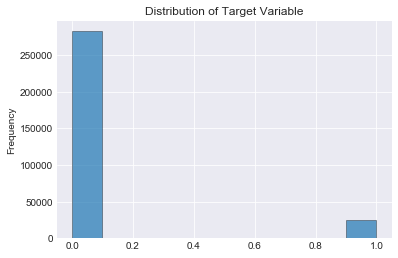

In [23]:
print(app_train['TARGET'].value_counts())
app_train['TARGET'].plot.hist(title = "Distribution of Target Variable", edgecolor = 'black', linewidth = 0.5, alpha = 0.7,)
plt.show()

In [24]:
print("Class 1: %.4f%%   Class 0: %.4f%%" % (app_train['TARGET'].value_counts()[0]/len(app_train), 
                                             app_train['TARGET'].value_counts()[1]/len(app_train)))

Class 1: 0.9193%   Class 0: 0.0807%


By looking at the histogram and the corresponding values, we notice that the vast majority of people paid the loans on time, such that we have an imbalanced dataset. This must and will be taken into account further in the project.

#### 1.A. Missing Values

In order to check for missing values, we'll create a function that computes the number and percentage of nulls for the specified dataset and displays that information in a dataframe. 

Let's see how is the dataset in terms of missing values.

In [25]:
eda.missing_values(app_train)

From 122 columns, there are 67 that have missing values in this dataset.


Number of Nulls Percentage of Nulls
AMT_ANNUITY                                12              0.004%
AMT_GOODS_PRICE                           278               0.09%
NAME_TYPE_SUITE                          1292               0.42%
OWN_CAR_AGE                            202929             65.991%
OCCUPATION_TYPE                         96391             31.346%
CNT_FAM_MEMBERS                             2              0.001%
EXT_SOURCE_1                           173378             56.381%
EXT_SOURCE_2                              660              0.215%
EXT_SOURCE_3                            60965             19.825%
APARTMENTS_AVG                         156061              50.75%
BASEMENTAREA_AVG                       179943             58.516%
YEARS_BEGINEXPLUATATION_AVG            150007             48.781%
YEARS_BUILD_AVG                        204488             66.498%
COMMONAREA_AVG                         214865             69.872%
ELEVATORS_AVG                          163891             53.296%
ENTRANCES_AVG                          154828             50.349%
FLOORSMAX_AVG                          153020             49.761%
FLOORSMIN_AVG                          208642             67.849%
LANDAREA_AVG                           182590             59.377%
LIVINGAPARTMENTS_AVG                   210199             68.355%
LIVINGAREA_AVG                         154350             50.193%
NONLIVINGAPARTMENTS_AVG                213514             69.433%
NONLIVINGAREA_AVG                      169682             55.179%
APARTMENTS_MODE                        156061              50.75%
BASEMENTAREA_MODE                      179943             58.516%
YEARS_BEGINEXPLUATATION_MODE           150007             48.781%
YEARS_BUILD_MODE                       204488             66.498%
COMMONAREA_MODE                        214865             69.872%
ELEVATORS_MODE                         163891             53.296%
ENTRANCES_MODE                         154828             50.349%
FLOORSMAX_MODE                         153020             49.761%
FLOORSMIN_MODE                         208642             67.849%
LANDAREA_MODE                          182590             59.377%
LIVINGAPARTMENTS_MODE                  210199             68.355%
LIVINGAREA_MODE                        154350             50.193%
NONLIVINGAPARTMENTS_MODE               213514             69.433%
NONLIVINGAREA_MODE                     169682             55.179%
APARTMENTS_MEDI                        156061              50.75%
BASEMENTAREA_MEDI                      179943             58.516%
YEARS_BEGINEXPLUATATION_MEDI           150007             48.781%
YEARS_BUILD_MEDI                       204488             66.498%
COMMONAREA_MEDI                        214865             69.872%
ELEVATORS_MEDI                         163891             53.296%
ENTRANCES_MEDI                         154828             50.349%
FLOORSMAX_MEDI                         153020             49.761%
FLOORSMIN_MEDI                         208642             67.849%
LANDAREA_MEDI                          182590             59.377%
LIVINGAPARTMENTS_MEDI                  210199             68.355%
LIVINGAREA_MEDI                        154350             50.193%
NONLIVINGAPARTMENTS_MEDI               213514             69.433%
NONLIVINGAREA_MEDI                     169682             55.179%
FONDKAPREMONT_MODE                     210295             68.386%
HOUSETYPE_MODE                         154297             50.176%
TOTALAREA_MODE                         148431             48.269%
WALLSMATERIAL_MODE                     156341             50.841%
EMERGENCYSTATE_MODE                    145755             47.398%
OBS_30_CNT_SOCIAL_CIRCLE                 1021              0.332%
DEF_30_CNT_SOCIAL_CIRCLE                 1021              0.332%
OBS_60_CNT_SOCIAL_CIRCLE                 1021              0.332%
DEF_60_CNT_SOCIAL_CIRCLE                 1021              0.332%
DAYS

We can see that we have way too many columns with missing values, and a considerable amount of them has more than 50% missing instances. In order to solve this problem, we might need to fill these values with the mean or the median, in case of numerical variables. If the columns have too much missing values, we might need to drop them, at the cost of losing information. 

#### 1.B. Column Data Types

Let's check the data types that we have for this dataset.

In [26]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


We have 65 columns that are of type 'float', 41 of type 'int' and 16 of type 'object'. This means that we have 106 numerical variables and 16 categorical variables.

#### 1.C. Numerical Variables

In [27]:
np.array(app_train.columns[app_train.dtypes != 'object'])

array(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPAR

As we said before, there are 106 numerical variables. It would be extensive to analyze all of them, so let's select some of them. We start with some information about the client and the about the loan: number of children, income, amount of loan, loan annuity, the price of good (if it is a consumer loan), the population of the client's region, age (in days), days of actual employment, age of client's car, number of family members, among others. Then, we have some information about the application (for example, whether he/she provided an email or not, or whether the client's permanent address matches the work address or not).

Then, we have 3 variables: 'EXT_SOURCE_1', 'EXT_SOURCE_2' and 'EXT_SOURCE_3', which represent the 'Normalized score from external data source(s)'. 

It follows a series of variables related to information regarding the client's building, which come in terms of average, median and mode. If we check the missing_values table, we can see that these have the same number of missing values (for example, the variable 'ELEVATORS', which is the number of elevators in the client's building, is expressed in terms of average, median and mode. For each of these, the number of missing values is the same). We also have variables related to whether the client provided a specific document or not, whose values vary between 0 and 1. Finally, we can check the number of enquiries to the Credit Bureau about the client an hour, day, week, month, quarter and year before the application. 

It seems that the most important information to analyze is the one related to the client: let's focus on the AGE, INCOME, EMPLOYMENT and AMOUNT OF LOAN/CREDIT. Just a note regarding the AGE and EMPLOYMENT variables: they are express in terms of days from the time of applicatiom, meaning that there are negative values. We'll translate them so that they express years and are easily interpretable.

Let's make use of a function that plots an histogram to analyze these numerical variables.

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64


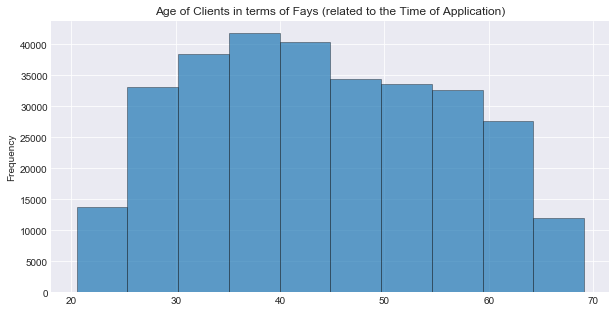

In [28]:
print((app_train['DAYS_BIRTH'] / -365).describe())
eda.plot_hist(app_train, 'DAYS_BIRTH', "Age of Clients in terms of Fays (related to the Time of Application)", -365)

The ages seem to be correct. There are no values that stand out: the youngest client had 20 years and the oldest 69 years. The most frequent bin is 35 to 40 years old.

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64


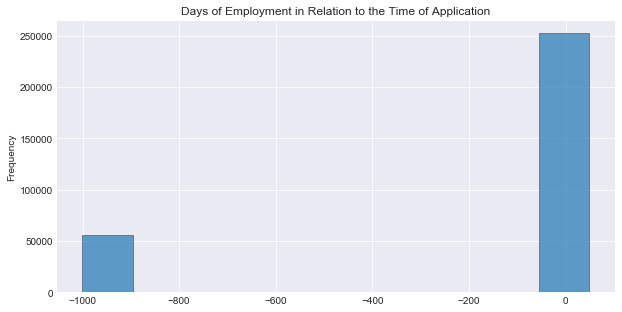

In [29]:
print((app_train['DAYS_EMPLOYED'] / -365).describe())
eda.plot_hist(app_train, 'DAYS_EMPLOYED', "Days of Employment in Relation to the Time of Application", -365)

The superior limits look fine, but there's something odd with the minimum: there's a client that has been employed for 1000 years, which is clearly wrong. The histogram tells us that this is a considerable repeated value, which makes us conclude that it looks like  a flag value. A good way to correct it is to replace with a NaN and them fill it with a particular strategy (like the mean). Let's make the replacement now and leave the imputation for the Data Cleaning part (we'll take the chance to make the correction in the test set too).

In [30]:
round(-1000.665753 * -365)

365243

In [31]:
app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace = True)
app_test['DAYS_EMPLOYED'].replace(365243, np.nan, inplace = True)

If we plot again, the histogram is quite different.

count    252137.000000
mean          6.531971
std           6.406466
min          -0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64


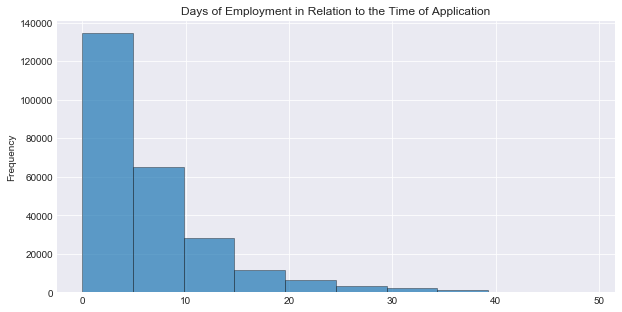

In [32]:
print((app_train['DAYS_EMPLOYED'] / -365).describe())
eda.plot_hist(app_train, 'DAYS_EMPLOYED', "Days of Employment in Relation to the Time of Application", -365)

The maximum years of employment is 49.

Let's continue with the analysis of the income of the client, which we'll express in monthly terms.

count     307511.00
mean       14066.49
std        19760.26
min         2137.50
25%         9375.00
50%        12262.50
75%        16875.00
max      9750000.00
Name: AMT_INCOME_TOTAL, dtype: float64


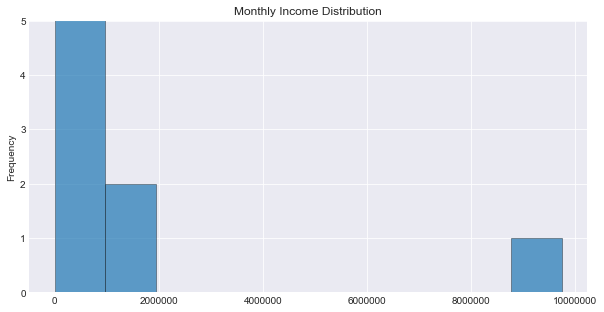

In [34]:
print((app_train['AMT_INCOME_TOTAL'] / 12).describe().round(2))
eda.plot_hist(app_train, 'AMT_INCOME_TOTAL', "Monthly Income Distribution", 12, y_lim_sup = 5)

There's a client that receives almost 10 million dollars per month. That seems odd. And the histogram clearly evidences that we are in the presence of some outliers. Let's replace them with NaN.

In [35]:
app_train['AMT_INCOME_TOTAL'].replace(9750000 * 12, np.nan, inplace = True)
app_test['AMT_INCOME_TOTAL'].replace(9750000 * 12, np.nan, inplace = True)

count     307510.00
mean       14034.83
std         9067.65
min         2137.50
25%         9375.00
50%        12262.50
75%        16875.00
max      1500007.50
Name: AMT_INCOME_TOTAL, dtype: float64


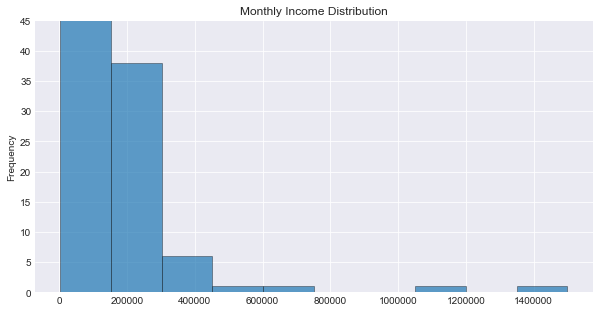

In [36]:
print((app_train['AMT_INCOME_TOTAL'] / 12).describe().round(2))
eda.plot_hist(app_train, 'AMT_INCOME_TOTAL', "Monthly Income Distribution", 12, y_lim_sup = 45)

We still have some outliers/anomalies. Let's replace every income that is above 200 000 dollars per month with NaN.

In [37]:
app_train.mask(app_train['AMT_INCOME_TOTAL'] > 200000 * 12, inplace = True)
app_test.mask(app_train['AMT_INCOME_TOTAL'] > 200000 * 12, inplace = True)

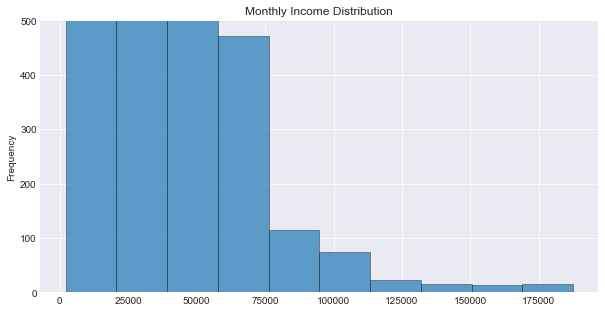

In [38]:
eda.plot_hist(app_train, 'AMT_INCOME_TOTAL', "Monthly Income Distribution", 12, y_lim_sup = 500)

Finally, let's see the credit amount.

count     307492.00
mean      598995.61
std       402463.35
min        45000.00
25%       270000.00
50%       513531.00
75%       808650.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64


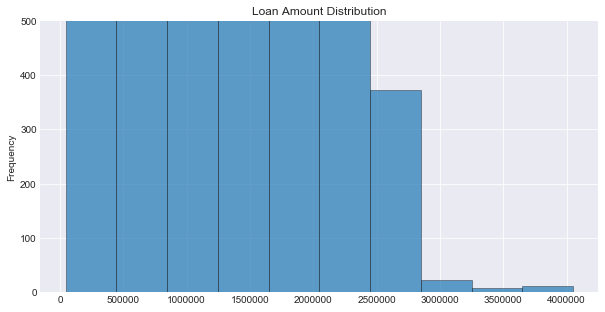

In [39]:
print((app_train['AMT_CREDIT']).describe().round(2))
eda.plot_hist(app_train, 'AMT_CREDIT', "Loan Amount Distribution", y_lim_sup = 500)

There are some loans that seem to be a bit excessive. They're probably outliers. Let's replace loans of more than 2.5 million dollars with NaN.

In [40]:
app_train.mask(app_train['AMT_CREDIT'] > 2500000, inplace = True)
app_test.mask(app_train['AMT_CREDIT'] > 2500000, inplace = True)

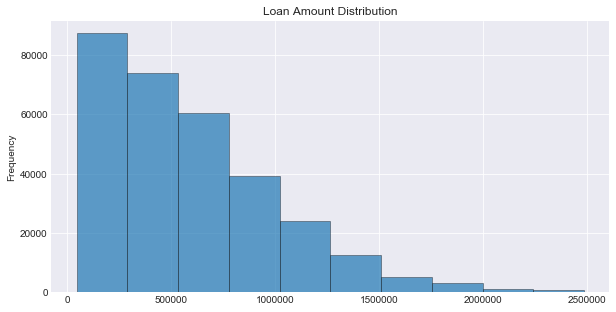

In [41]:
eda.plot_hist(app_train, 'AMT_CREDIT', "Loan Amount Distribution")

Much better.

Let's see these plots related to the target variable, to see if we can start to formulate some hypothesis.

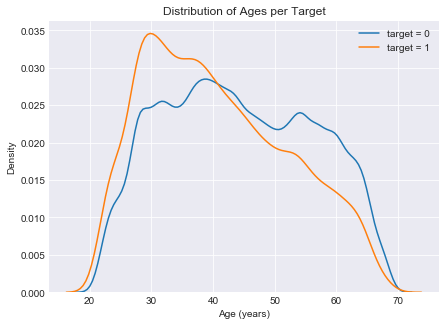

In [42]:
plt.figure(figsize = (7, 5))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target = 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target = 1')
plt.legend()
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages per Target')
plt.show()

It seems that client's with less than 40 years are more prone to pay the loan, whereas client's with more than 40 years tend to have more payment difficulties.

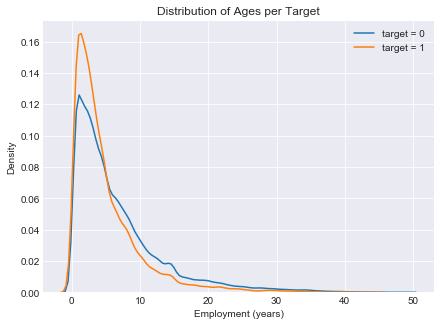

In [43]:
plt.figure(figsize = (7, 5))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_EMPLOYED'] / -365, label = 'target = 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_EMPLOYED'] / -365, label = 'target = 1')
plt.legend()
plt.xlabel('Employment (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages per Target')
plt.show()

**WHAT CAN BE SAID ABOUT THIS GRAPH?** 

Let's now analyze our categorical variables.

#### 1.D. Categorical Variables

In [44]:
np.array(app_train.columns[app_train.dtypes == 'object'])

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype=object)

In [45]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

The first column idenitfies if a loan is cash or revolving. Then, we have information about the client's gender, whether he/she owns a car or not, whether he/she owns a house/flat or if rents, the client's type of income, education, civil stauts, house type and profession. Again, there is more information about the client's building. If we take a look at the number of unique values per variable, we can see that most of them have a smaller variety of values. Nevertheless, these will certaintly be encoded further in the project.


Let's create a function that plots a pie chart to analyze the distribution values for a specific column.


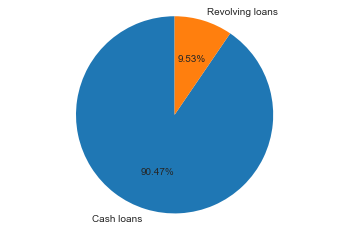

In [46]:
eda.plot_pie_chart(app_train, 'NAME_CONTRACT_TYPE')

These two different categories might require some explanation: Cash loans are loans that have a fixed number of payments; Revolving loans is a type of credit whose payments are not fixed. A good example for these are the credit cards. That being said, most loans from Home Credit are of type 'cash'.

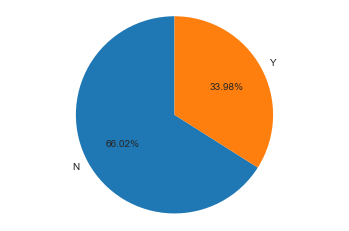

In [47]:
eda.plot_pie_chart(app_train, 'FLAG_OWN_CAR')

We can see that the majority of client's doesn't own a car.

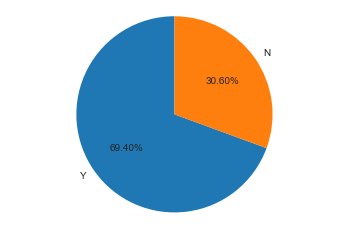

In [48]:
eda.plot_pie_chart(app_train, 'FLAG_OWN_REALTY')

But it owns a house or a flat.

{nan, 'Secondary / secondary special', 'Lower secondary', 'Incomplete higher', 'Academic degree', 'Higher education'}


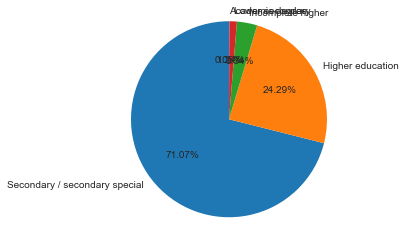

In [49]:
print(set(app_train['NAME_EDUCATION_TYPE'].values))
eda.plot_pie_chart(app_train, 'NAME_EDUCATION_TYPE')

Regarding education, it seems that 95.36% of the Home Credit client's has a high education (at least the secondary ou higher education), which is fairly satisfatory.

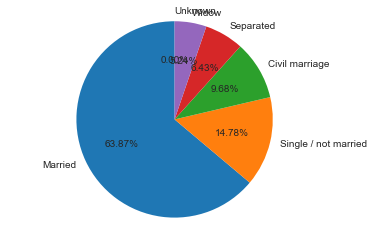

In [50]:
eda.plot_pie_chart(app_train, 'NAME_FAMILY_STATUS')

Most client's are married. 

Now, let's analyze the variable 'NAME_HOUSING_TYPE'. Due to the larger number of possible values, the pie chart is hard to read. Therefore, we are going to use a bar chart to analyze this variable.

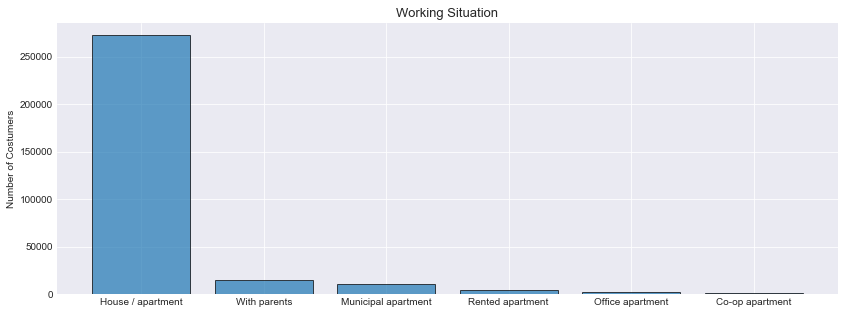

In [51]:
housing_count = app_train['NAME_HOUSING_TYPE'].value_counts()

plt.figure(figsize = (14, 5))
plt.bar(housing_count.index, housing_count.values, align = 'center', alpha = 0.7, edgecolor = 'black')
plt.ylabel('Number of Costumers')
plt.title('Working Situation', size = 13)
plt.show()

We cannsee that most clients have a house or an apartment of their own.

We'll also use a bar chart to analyze the 'NAME_INCOME_TYPE' variable.

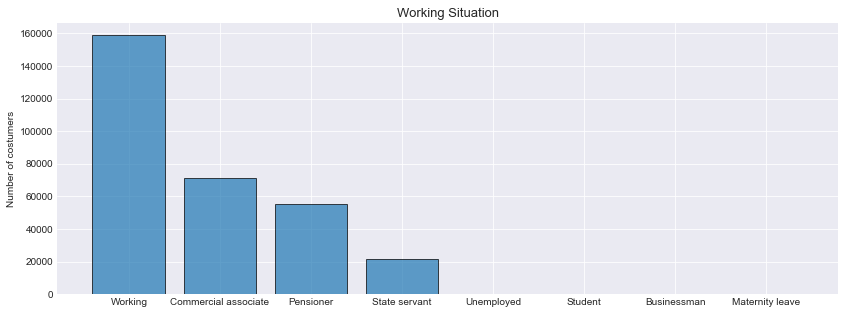

In [52]:
income_count = app_train['NAME_INCOME_TYPE'].value_counts()

plt.figure(figsize = (14, 5))
plt.bar(income_count.index, income_count.values, align = 'center', alpha = 0.7, edgecolor = 'black')
plt.ylabel('Number of costumers')
plt.title('Working Situation', size = 13)
plt.show()

**FALTA VER ESTA PARTE**

#### 1.E. Correlations

In [53]:
app_train.iloc[:, 1:].corr()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                        1.000000      0.019176         -0.022377   
CNT_CHILDREN                  0.019176      1.000000          0.027758   
AMT_INCOME_TOTAL             -0.022377      0.027758          1.000000   
AMT_CREDIT                   -0.029962      0.002076          0.377495   
AMT_ANNUITY                  -0.012353      0.021369          0.456055   
AMT_GOODS_PRICE              -0.039376     -0.001998          0.384499   
REGION_POPULATION_RELATIVE   -0.037057     -0.025707          0.185509   
DAYS_BIRTH                    0.078266      0.330994          0.063800   
DAYS_EMPLOYED                 0.074885      0.061021         -0.035822   
DAYS_REGISTRATION             0.042040      0.183391          0.070300   
DAYS_ID_PUBLISH               0.051599     -0.027973          0.023543   
OWN_CAR_AGE                   0.037290      0.008530         -0.144226   
FLAG_MOBIL                    0.000535      0.001042          0.000790   
FLAG_EMP_PHONE                0.046039      0.240858          0.154542   
FLAG_WORK_PHONE               0.028571      0.055701         -0.043657   
FLAG_CONT_MOBILE              0.000378     -0.000795         -0.021004   
FLAG_PHONE                   -0.023713     -0.029877          0.001728   
FLAG_EMAIL                   -0.001791      0.022597          0.096469   
CNT_FAM_MEMBERS               0.009324      0.879161          0.035387   
REGION_RATING_CLIENT          0.058770      0.025448         -0.208364   
REGION_RATING_CLIENT_W_CITY   0.060799      0.024821         -0.224005   
HOUR_APPR_PROCESS_START      -0.024145     -0.007374          0.084932   
REG_REGION_NOT_LIVE_REGION    0.005686     -0.013318          0.074010   
REG_REGION_NOT_WORK_REGION    0.007069      0.008205          0.150783   
LIVE_REGION_NOT_WORK_REGION   0.002931      0.014857          0.141010   
REG_CITY_NOT_LIVE_CITY        0.044469      0.020034          0.009233   
REG_CITY_NOT_WORK_CITY        0.051096      0.070686          0.018401   
LIVE_CITY_NOT_WORK_CITY       0.032599      0.069991          0.022755   
EXT_SOURCE_1                 -0.155337     -0.138445          0.089677   
EXT_SOURCE_2                 -0.160487     -0.018032          0.155539   
EXT_SOURCE_3                 -0.178870     -0.042747         -0.072054   
APARTMENTS_AVG               -0.029514     -0.013293          0.106954   
BASEMENTAREA_AVG             -0.022762     -0.008502          0.055619   
YEARS_BEGINEXPLUATATION_AVG  -0.009731      0.006892          0.016976   
YEARS_BUILD_AVG              -0.022213      0.030166          0.044348   
COMMONAREA_AVG               -0.018543      0.000100          0.091633   
ELEVATORS_AVG                -0.034231     -0.007185          0.145421   
ENTRANCES_AVG                -0.019266     -0.008332          0.012404   
FLOORSMAX_AVG                -0.044025     -0.009912          0.185116   
FLOORSMIN_AVG                -0.033453     -0.009006          0.143045   
LANDAREA_AVG                 -0.011039     -0.003118         -0.004825   
LIVINGAPARTMENTS_AVG         -0.025036     -0.008642          0.109117   
LIVINGAREA_AVG               -0.033074     -0.010275          0.124865   
NONLIVINGAPARTMENTS_AVG      -0.003140      0.004027          0.030182   
NONLIVINGAREA_AVG            -0.013611     -0.000095          0.076493   
APARTMENTS_MODE              -0.027309     -0.012114          0.092741   
BASEMENTAREA_MODE            -0.019996     -0.008467          0.040782   
YEARS_BEGINEXPLUATATION_MODE -0.009038      0.006191          0.015753   
YEARS_BUILD_MODE             -0.022112      0.029575          0.039287   
COMMONAREA_MODE              -0.016336      0.000488          0.077323   
ELEVATORS_MODE               -0.032181     -0.006459          0.132607   
ENTRANCES_MODE               -0.017505     -0.006820          0.001727   
FLOORSMAX_MODE               -0.043231     -0.009706          0.177286   
FLOORSMIN_MODE               -0.0325

In [54]:
print(app_train['REGION_RATING_CLIENT'].corr(app_train['TARGET']))
app_train['REGION_RATING_CLIENT'].value_counts()

0.058770386520843106


2.0    226784
3.0     48299
1.0     32048
Name: REGION_RATING_CLIENT, dtype: int64

<div class="alert alert-danger">
    <b> FINAL REMARKS </b>
    <br> This is to summarize what were the conclusions of this part. TO DELETE ONCE THE DATA CLEANING IS DONE. </br>
    <p> </p>
    <p> i) Imbalanced dataset </p>
    <p> ii) There are many columns with null values. What to do with them? </p>
    <p> iii) We have replaced anomalies with NaN. Don't forget to impute values in these columns as well </p>
    <p> iv) How to encode the categorical variables? Some variables have many values (drop?) </p>
    <p> v) </p>
</div>